# 1. 팬시 인덱싱 알아보기
팬시 인덱싱은 개념적으로 간단하다. 즉, 한 번에 여러 배열 요소에 접근하기 위해 인덱스의 배열을 전달한다.

In [1]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [3]:
ind = [3,7,2]
x[ind]

array([71, 86, 14])

In [4]:
# 팬시 인덱싱을 이용하면 결과의 형상이 인덱싱 대상 배열의 형상이 아니라 인덱스 배열의 형상을 반영한다.
ind = np.array([[3,7],
               [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [5]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [7]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [8]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

# 2. 결합 인덱싱

In [9]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [10]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [11]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

# 3. 예제: 임의의 점 선택하기

In [12]:
mean = [0, 0]
cov = [[1,2],
      [2,5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

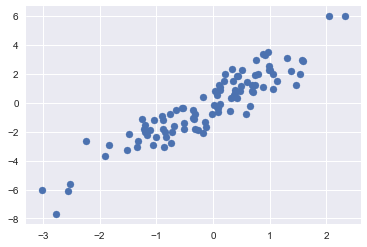

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1]);

In [14]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([93,  5, 72, 97, 65, 51, 88, 43, 48, 79,  9, 89, 38,  2, 40, 58, 95,
       36, 68,  3])

In [15]:
selection = X[indices]
selection.shape

(20, 2)

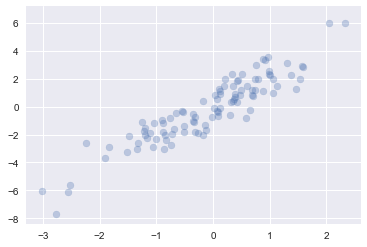

In [16]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
           facecolor='none', s=200);

# 4. 팬시 인덱싱으로 값 변경하기

In [17]:
x = np.arange(10)
i = np.array([2,1,8,4])
print(x)
x[i] = 99
print(x)

[0 1 2 3 4 5 6 7 8 9]
[ 0 99 99  3 99  5  6  7 99  9]


In [21]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [22]:
x = np.zeros(10)
x[[0,0]] = [4,6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [24]:
x = np.zeros(10)
np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

# 5. 예제: 데이터 구간화

In [26]:
np.random.seed(42)
x = np.random.randn(100)

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

i = np.searchsorted(bins, x)

np.add.at(counts, i, 1)

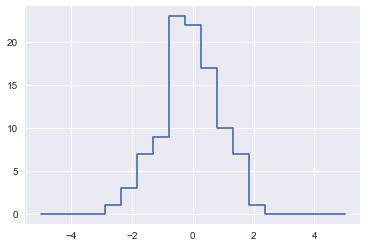

In [27]:
plt.plot(bins, counts, linestyle = 'steps');

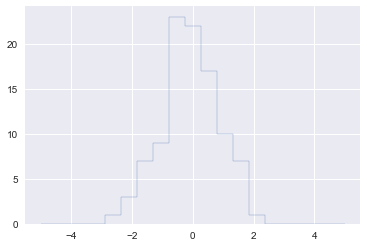

In [29]:
plt.hist(x, bins, histtype = 'step');

In [30]:
print('NumPy routine:')
%timeit counts, edges = np.histogram(x, bins)
print('Custom routine:')
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
88 µs ± 16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
21 µs ± 1.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [32]:
x = np.random.randn(1000000)
print('NumPy routine:')
%timeit counts, edges = np.histogram(x, bins)

print('Custom routine:')
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
84.1 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
164 ms ± 1.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 6. 배열 정렬

In [33]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [34]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [37]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [38]:
bogosort(x)

array([1, 2, 3, 4, 5])

# 7. NumPy의 빠른 정렬: np.sort와 np.argsort

In [39]:
np.sort(x)

array([1, 2, 3, 4, 5])

In [40]:
x.sort()
print(x)

[1 2 3 4 5]


In [46]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [47]:
x[i]

array([1, 2, 3, 4, 5])

# 8. 행이나 열 기준으로 정렬하기

In [49]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [50]:
# X의 각 열을 정렬
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [51]:
# X의 각 행을 정렬
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

# 9. 부분 정렬: 파티션 나누기

In [52]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

# 결과로 얻은 배열의 처음 세 개의 값은 배열의 가장 작은 값 세 개에 해당하며, 배열의 나머지 위치에는 나머지 값이 들어있다.
# 두 파티션 내의 요소는 임의의 순서를 가진다.

array([2, 1, 3, 4, 6, 5, 7])

In [53]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

# 10. 예제: k 최근접 이웃 알고리즘

In [54]:
X = rand.rand(10, 2)

In [55]:
X

array([[0.00706631, 0.02306243],
       [0.52477466, 0.39986097],
       [0.04666566, 0.97375552],
       [0.23277134, 0.09060643],
       [0.61838601, 0.38246199],
       [0.98323089, 0.46676289],
       [0.85994041, 0.68030754],
       [0.45049925, 0.01326496],
       [0.94220176, 0.56328822],
       [0.3854165 , 0.01596625]])

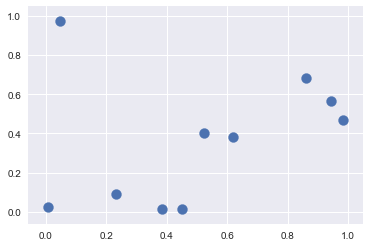

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0], X[:,1], s=100);

In [58]:
dist_sq = np.sum((X[:, np.newaxis,:] - X[np.newaxis, :, :]) ** 2, axis = -1)

In [59]:
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [60]:
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [61]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [62]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [63]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [64]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

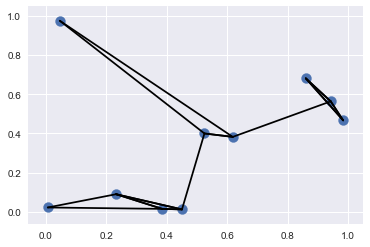

In [65]:
plt.scatter(X[:,0], X[:, 1], s = 100)
K=2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')